# 02 — EDA Pakistan News Headlines (Kaggle)
Exploratory Data Analysis of the general Pakistani news corpus.
**Goal**: understand the dataset structure to use it for Word2Vec training.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/pakistan_news.csv')

print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

Shape: (26706, 4)
Columns: ['Story Heading', 'Story Excerpt', 'Timestamp', 'Section']


In [2]:
# Overview
print(df.head(10))
print(df.dtypes)

                                       Story Heading  \
0  Federation of Pakistan v Gen Pervez Musharraf:...   
1  Chinese national held for beating traffic poli...   
2  Iraqi paramilitaries call for withdrawal from ...   
3  Sarmad Khoosat reveals why Zindagi Tamasha's t...   
4               PSL 2020 set to begin on February 20   
5  Despite extreme differences, Centre willing to...   
6  'Is NAB law only there for politicians?' asks ...   
7  UAE Crown Prince to visit Pakistan tomorrow 't...   
8  ‘New-year euphoria’ pushes stocks in the green...   
9  An Islamabad Police parody account is trolling...   

                                       Story Excerpt             Timestamp  \
0  After the special court's verdict in the high ...  01 Jan, 2020 09:55pm   
1  The suspect assaulted the constable after he p...  01 Jan, 2020 08:35pm   
2  Overnight, demonstrators pitched tents and cam...  01 Jan, 2020 07:26pm   
3                       We also have a release date.  02 Jan, 2020 01:1

In [3]:
# Missing values
print('Nulls:\n', df.isnull().sum())

Nulls:
 Story Heading    230
Story Excerpt      0
Timestamp         11
Section           54
dtype: int64


In [8]:
text_col = 'Story Excerpt'
dupes = df[text_col].duplicated().sum()
print(f'Duplicate rows: {dupes} / {len(df)}')

Duplicate rows: 336 / 26706


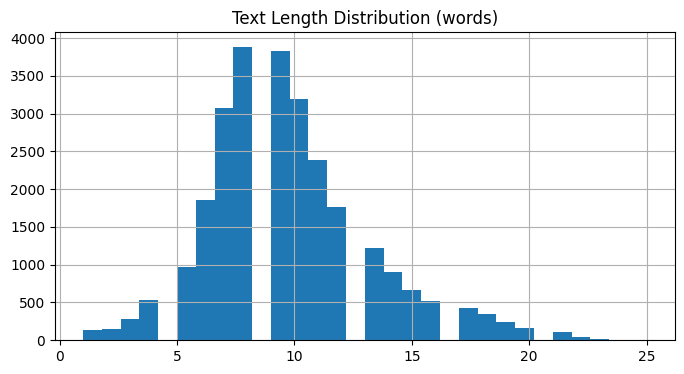

count    26706.000000
mean         9.649629
std          3.483981
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         25.000000
Name: text_len, dtype: float64


In [9]:
text_col = 'Story Excerpt'
df['text_len'] = df[text_col].astype(str).str.split().str.len()
df['text_len'].hist(bins=30, figsize=(8, 4))
plt.title('Text Length Distribution (words)')
plt.show()
print(df['text_len'].describe())

Format %d %b, %Y %I:%M%p: 2134 parsed
Format %d %b %Y: 2134 parsed
Format %Y-%m-%d: 2134 parsed
Format %d/%m/%Y: 2134 parsed

With infer: 2134 parsed
Date range: 2020-01-01 07:35:00 → 2020-08-14 17:46:00
NaT remaining: 24572


/tmp/ipykernel_37196/2924954883.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')


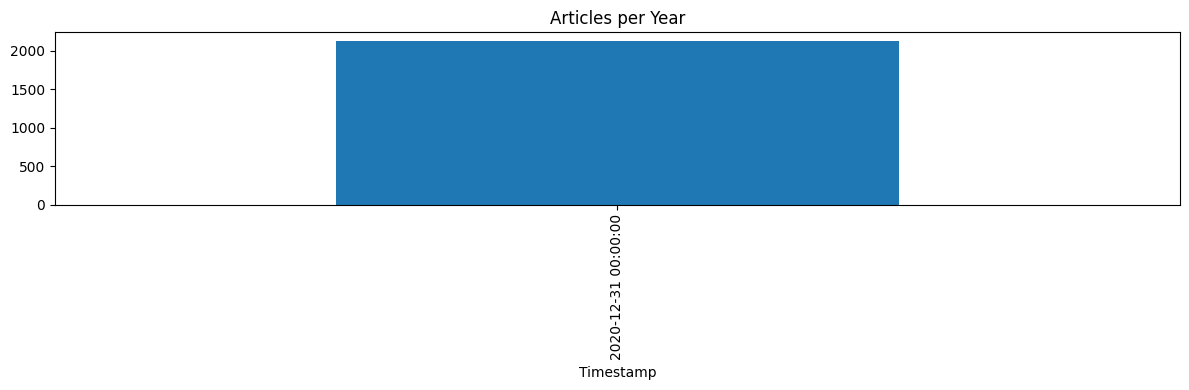

In [11]:
if date_candidates:
    date_col = date_candidates[0]
    
    # Try multiple formats
    for fmt in ['%d %b, %Y %I:%M%p', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y']:
        parsed = pd.to_datetime(df[date_col], format=fmt, errors='coerce')
        success = parsed.notna().sum()
        print(f'Format {fmt}: {success} parsed')
    
    # Use the best one or let pandas infer
    df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
    print(f'\nWith infer: {df[date_col].notna().sum()} parsed')
    print(f'Date range: {df[date_col].min()} → {df[date_col].max()}')
    print(f'NaT remaining: {df[date_col].isna().sum()}')
    
    df.set_index(date_col).resample('YE').size().plot(kind='bar', figsize=(12, 4), title='Articles per Year')
    plt.tight_layout()
    plt.show()

## EDA Conclusions
- [ ] Available columns: ...
- [ ] Total articles: ...
- [ ] Date range: ...
- [ ] Duplicates to clean: ...
- [ ] Average text length: ...
- [ ] Useful for Word2Vec training: yes/no
- [ ] Key points to address in preprocessing: ...